In [163]:
import pandas as pd
from google.cloud import storage
import os
import pandas as pd
import datetime 
import io
from google.cloud import storage


def list_blobs_with_prefix(bucket_name, prefix, delimiter=None):
    """Lists all the blobs in the bucket that begin with the prefix.

    This can be used to list all blobs in a "folder", e.g. "public/".

    The delimiter argument can be used to restrict the results to only the
    "files" in the given "folder". Without the delimiter, the entire tree under
    the prefix is returned. For example, given these blobs:

        a/1.txt
        a/b/2.txt

    If you specify prefix ='a/', without a delimiter, you'll get back:

        a/1.txt
        a/b/2.txt

    However, if you specify prefix='a/' and delimiter='/', you'll get back
    only the file directly under 'a/':

        a/1.txt

    As part of the response, you'll also get back a blobs.prefixes entity
    that lists the "subfolders" under `a/`:

        a/b/
    """

    storage_client = storage.Client(project = 'steady-voltage-236500')

    # Note: Client.list_blobs requires at least package version 1.17.0.
    blobs = storage_client.list_blobs(bucket_name, prefix=prefix, delimiter=delimiter)
    return blobs 

# repo_weekly_stats_blobs = list_blobs_with_prefix('github-repos-scraped', prefix = 'general_repo_stats/')
repo_general_info_blobs = list_blobs_with_prefix('github-repos-scraped', prefix = 'general_info/')
general_info_blobs = [file for file in repo_general_info_blobs]
latest_general_info_blob = general_info_blobs[-1]
latest_general_info_df = pd.read_csv(io.BytesIO(latest_general_info_blob.download_as_string()))

In [ ]:
# Get Repomapping to coins
repo_mapping_df = pd.read_csv('../data/merged_repos.csv')

In [ ]:
#Merge mapping to general scraped info
repo_mapping_w_info_df = pd.merge(repo_mapping_df, latest_general_info_df, left_on = 'repo_paths', right_on = 'repo', how = 'left')

In [ ]:
#Drop duplicate scrapes
repo_mapping_w_info_df = repo_mapping_w_info_df.drop_duplicates(subset = ['repo_paths', 'scraped_at'], keep = 'first').reset_index(drop = True)

In [ ]:
import json
repo_mapping_w_info_df['contributors_list'] = repo_mapping_w_info_df.contributors.apply(lambda x: eval(x)['login'] if isinstance(x, str) else [''])

In [279]:
repo_mapping_w_info_df[repo_mapping_w_info_df.name == 'Ethereum']

,name,categories,github_organizations,repos,repo_paths,repo,created_at,updated_at,pushed_at,size,...,language,has_issues,has_projects,has_downloads,has_wiki,has_pages,forks_count,contributors,scraped_at,contributors_list
39232,Ethereum,"[' Pods Finance', ' Proof of Humanity', '0x', ...","['https://github.com/commons-stack', 'https://...",https://github.com/18dew/Project-Basil,/18dew/Project-Basil,/18dew/Project-Basil,2015-09-15T16:16:55Z,2020-04-18T08:14:32Z,2015-09-15T17:40:04Z,140.0,...,NaN,True,True,True,True,False,1.0,"{'login': ['18dew'], 'url': ['https://api.gith...",2022-01-19 23:58:18,[18dew]
39233,Ethereum,"[' Pods Finance', ' Proof of Humanity', '0x', ...","['https://github.com/commons-stack', 'https://...",https://github.com/200eth/200eth.com,/200eth/200eth.com,/200eth/200eth.com,2019-01-11T10:00:53Z,2019-12-23T19:50:16Z,2019-02-10T08:51:27Z,39.0,...,NaN,True,True,True,True,False,1.0,"{'login': ['200eth'], 'url': ['https://api.git...",2022-01-19 23:58:18,[200eth]
39234,Ethereum,"[' Pods Finance', ' Proof of Humanity', '0x', ...","['https://github.com/commons-stack', 'https://...",https://github.com/97network/Kelsen,/97network/Kelsen,/97network/Kelsen,2018-05-07T15:32:32Z,2021-01-14T18:07:11Z,2019-12-08T21:24:55Z,3696.0,...,JavaScript,True,True,True,True,False,2.0,"{'login': ['l-henri', 'louis-md'], 'url': ['ht...",2022-01-19 23:58:18,"[l-henri, louis-md]"
39235,Ethereum,"[' Pods Finance', ' Proof of Humanity', '0x', ...","['https://github.com/commons-stack', 'https://...",https://github.com/aashutoshrathi/dcart,/aashutoshrathi/dcart,/aashutoshrathi/dcart,2019-01-23T05:58:07Z,2022-01-07T04:41:19Z,2022-01-18T05:32:26Z,45878.0,...,JavaScript,True,True,True,True,True,5.0,"{'login': ['dependabot-preview[bot]', 'dependa...",2022-01-19 23:58:18,"[dependabot-preview[bot], dependabot[bot], aas..."
39236,Ethereum,"[' Pods Finance', ' Proof of Humanity', '0x', ...","['https://github.com/commons-stack', 'https://...",https://github.com/aelchim/WednesdayClub,/aelchim/WednesdayClub,/aelchim/WednesdayClub,2018-12-12T03:45:35Z,2019-10-05T02:48:33Z,2019-10-05T02:48:31Z,21.0,...,NaN,True,True,True,True,False,1.0,"{'login': ['aelchim'], 'url': ['https://api.gi...",2022-01-19 23:58:18,[aelchim]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40998,Ethereum,"[' Pods Finance', ' Proof of Humanity', '0x', ...","['https://github.com/commons-stack', 'https://...",https://github.com/zkopru-network/stress-test-...,/zkopru-network/stress-test-results,/zkopru-network/stress-test-results,2021-10-20T10:11:37Z,2021-12-16T20:44:33Z,2022-01-13T15:44:53Z,8013.0,...,TypeScript,True,False,True,False,True,1.0,"{'login': ['sifnoc'], 'url': ['https://api.git...",2022-01-19 23:58:18,[sifnoc]
40999,Ethereum,"[' Pods Finance', ' Proof of Humanity', '0x', ...","['https://github.com/commons-stack', 'https://...",https://github.com/zkopru-network/wallet,/zkopru-network/wallet,/zkopru-network/wallet,2021-04-26T21:50:32Z,2021-12-09T08:25:48Z,2022-01-17T21:41:09Z,212211.0,...,Vue,True,True,True,True,False,3.0,"{'login': ['JChanceHud', 'tkmct'], 'url': ['ht...",2022-01-19 23:58:18,"[JChanceHud, tkmct]"
41000,Ethereum,"[' Pods Finance', ' Proof of Humanity', '0x', ...","['https://github.com/commons-stack', 'https://...",https://github.com/zkopru-network/website,/zkopru-network/website,/zkopru-network/website,2020-07-12T04:33:53Z,2021-03-24T10:12:21Z,2022-01-14T14:55:42Z,2643.0,...,JavaScript,True,True,True,True,False,1.0,"{'login': ['wanseob', 'dependabot[bot]', 'mhch...",2022-01-19 23:58:18,"[wanseob, dependabot[bot], mhchia]"
41001,Ethereum,"[' Pods Finance', ' Proof of Humanity', '0x', ...","['https://github.com/commons-stack', 'https://...",https://github.com/zkopru-network/zkopru,/zkopru-network/zkopru,/zkopru-network/zkopru,2020-04-06T13:22:25Z,2022-01-17T19:44:55Z,2022-01-15T20:29:40Z,40419.0,...,TypeScript,True,True,True,False,False,18.0,"{'login': ['wanseob', 'JChanceHud', 'sifnoc', ...",2022-01-19 23:58:18,"[wanseob,

In [ ]:
nt = Network("500px", "500px")
nt.from_nx(subgraph)
nt.show("nx.html")

In [ ]:

token_graph_info_df = repo_mapping_w_info_df.groupby('name').agg({"repo":[lambda x: list(set(x)), 'size'], "contributors_list":[lambda x: list(set([item for sublist in x for item in sublist]))], 'language':[lambda x: list(set(x))], 'stargazers_count':'sum', 'watchers_count':'sum', 'forks_count':'sum'})

In [ ]:
token_graph_info_df.columns

MultiIndex([(             'repo', '<lambda_0>'),
            (             'repo',       'size'),
            ('contributors_list',   '<lambda>'),
            (         'language',   '<lambda>'),
            ( 'stargazers_count',        'sum'),
            (   'watchers_count',        'sum'),
            (      'forks_count',        'sum')],
           )

In [ ]:
token_graph_info_df.columns = [x+'_'+y for x,y in token_graph_info_df.columns]
token_graph_info_df.rename(columns={"repo_<lambda_0>":"repos", "repo_size":"repo_count", 'contributors_list_<lambda>':"contributors_list", "language_<lambda>":"languages", "stargazers_count_sum":"stargazers_count", "watchers_count_sum":"watchers_count", "forks_count_sum":"forks_count"}, inplace = True)

In [ ]:
from collections import Counter
c = Counter([item for sublist in token_graph_info_df.contributors_list.tolist() for item in sublist])

In [ ]:
c.most_common(5)

[('dependabot[bot]', 1161),
 ('dependabot-preview[bot]', 431),
 ('hewigovens', 410),
 ('', 402),
 ('gavofyork', 350)]

In [ ]:
#Remove bots & blank contributors
token_graph_info_df['contributors_list'] = token_graph_info_df.contributors_list.apply(lambda x: [i for i in x if i not in ['dependabot[bot]','dependabot-preview[bot]', '']])

In [ ]:
# from collections import Counter
# Counter([item for sublist in token_graph_info_df.contributors_list.tolist() for item in sublist]).most_common(5)

In [ ]:
from tqdm import tqdm
from collections import defaultdict
intersections_dict = defaultdict(list)

for index, row in tqdm(token_graph_info_df.iterrows()):
    other_tokens_df = token_graph_info_df[token_graph_info_df.index != index]
    for index2, row2 in other_tokens_df.iterrows():
        intersection_contributors = set(row['contributors_list']).intersection(set(row2['contributors_list']))
        num_shared_contributors = len(intersection_contributors)
        if num_shared_contributors>0:
            intersections_dict[index].append((index2, num_shared_contributors))


3601it [22:28,  2.67it/s]


In [168]:
token_graph_info_df

,repos,repo_count,contributors_list,languages,stargazers_count,watchers_count,forks_count,contrib_intersection_counts
name,,,,,,,,
Certus One,"[/certusone/wormhole-token-list, /certusone/to...",36,"[linuxdev53, ravenac95, leoluk, billettc, gama...","[nan, HTML, Python, Shell, Go, TypeScript, Rus...",194.0,194.0,104.0,"[( Pods Finance, 1), ( Proof of Humanity, 1), ..."
Code 423n4,"[/code-423n4/2021-05-visorfinance, /code-423n4...",116,"[prateekreddy, jkilpatr, reservordogg, joshuas...","[nan, Solidity, JavaScript, Python, TypeScript...",101.0,101.0,138.0,"[( Pods Finance, 5), ( THORSwap, 2), (0x, 2), ..."
Pods Finance,"[/pods-finance/contracts, /pods-finance/DeFi-P...",13,"[mikedemarais, b1u3h4t, thiagomva, Jeffqg123, ...","[nan, TypeScript, JavaScript]",57.0,57.0,19.0,"[( Certus One, 1), ( Code 423n4, 5), ( Proof o..."
Proof of Humanity,[/Proof-Of-Humanity/Proof-Of-Humanity.github.i...,8,"[marsrobertson, ferittuncer, clesaege, emilian...","[nan, TypeScript]",3.0,3.0,2.0,"[( Certus One, 1), ( Pods Finance, 2), ( Subst..."
RMRK Team,"[/rmrk-team/evm, /rmrk-team/batch-send-ui, /rm...",17,"[KaiserKarel, w32blaster, h4x3rotab, Nethny, g...","[nan, Solidity, JavaScript, CSS, Go, TypeScrip...",190.0,190.0,75.0,"[( Substrate Developer Hub, 2), ( aSOL, 1), (0..."
...,...,...,...,...,...,...,...,...
zLot,[/rueisnax/zlot-finance-governance-staking-sub...,1,[rueisnax],[TypeScript],0.0,0.0,0.0,[]
zeitgeistpm,"[/zeitgeistpm/Dynamic-Market-Maker-Zeitgeist, ...",2,[numacoding],[Python],12.0,12.0,1.0,"[(Zeitgeist, 1)]"
zenchain,"[/zenchainprotocol/keplr-extension, /zenchainp...",19,"[jgimeno, gamarin2, tessr, ethanfrey, derfredy...","[nan, JavaScript, Shell, TypeScript, Vue]",15.0,15.0,2.0,"[( Certus One, 37), ( Code 423n4, 1), ( Pods F..."


In [177]:
import concurrent.futures
intersections_dict2 =  defaultdict(list)


def get_intersection(arg):
    index, row = arg
    other_tokens_df = token_graph_info_df[token_graph_info_df.index != index]
    intersections = []
    for index2, row2 in other_tokens_df.iterrows():
        intersection_contributors = set(row['contributors_list']).intersection(set(row2['contributors_list']))
        num_shared_contributors = len(intersection_contributors)
        if num_shared_contributors>0:
            # intersections.append((index2, num_shared_contributors))
            intersections_dict2[index].append((index2, num_shared_contributors))
    return index, intersections

argument_list = [(idx,row) for idx,row in token_graph_info_df.iterrows()]

with concurrent.futures.ThreadPoolExecutor() as executor2:
        threads2 = list(
            tqdm(executor2.map(get_intersection, argument_list), total=len(argument_list)))


100%|██████████| 3601/3601 [17:38<00:00,  3.40it/s]  


In [277]:
row1

,repos,repo_count,contributors_list,languages,stargazers_count,watchers_count,forks_count,contrib_intersection_counts
name,,,,,,,,
Ethereum,"[/EthWorks/html-css-starter, /rainbow-me/make-...",1771,"[tlively, wdmmaaland, PabloLefort, tkbky, John...","[nan, QML, C#, PowerShell, CoffeeScript, Scala...",294246.0,294246.0,99810.0,"[( Certus One, 19), ( Code 423n4, 45), ( Pods ..."


In [275]:
# token_graph_info_df.to_csv("../data/token_graph_info_w_edges.csv")
# intersections_dict2[' Certus One']
row1 = token_graph_info_df[token_graph_info_df.index == 'Ethereum']
row2 = token_graph_info_df[token_graph_info_df.index == 'Truffle']

set(row1['contributors_list'][0]).intersection(set(row2['contributors_list'][0]))

992

In [189]:
#Add contributor edges
token_graph_info_df['contrib_intersection_counts'] = token_graph_info_df.index.map(intersections_dict2)
exploded_edge_items_iterable = token_graph_info_df['contrib_intersection_counts'].explode().items()
graph_contributor_edges_list = [(index, row[0], {'weight':row[1]})  for (index, row) in exploded_edge_items_iterable if isinstance(row, tuple)]


In [190]:
edge_df = pd.DataFrame(graph_contributor_edges_list)

In [191]:
edge_df_dedupped = edge_df.astype(str).drop_duplicates()

In [192]:
set(token_graph_info_df[token_graph_info_df.index.isin([' Certus One', ' Pods Finance'])].contributors_list.iloc[0]).intersection(set(token_graph_info_df[token_graph_info_df.index.isin([' Certus One', ' Pods Finance'])].contributors_list.iloc[1]))

set()

In [197]:
edge_df_dedupped.rename(columns = {0:'src', 1:'dst', 2:'attributes'}, inplace = True)

In [274]:
log1 = (edge_df_dedupped.src == 'Ethereum') & (edge_df_dedupped.dst == 'Truffle')
log2 = (edge_df_dedupped.dst == 'Ethereum') & (edge_df_dedupped.src == 'Truffle')
edge_df_dedupped[log1 | log2]

,src,dst,attributes
461821,Ethereum,Truffle,{'weight': 992}
1221689,Truffle,Ethereum,{'weight': 992}


In [204]:
# log1 = (edge_df_dedupped.src == ' Certus One') & (edge_df_dedupped.dst == ' Substrate Developer Hub')
# log2 = (edge_df_dedupped.dst == ' Certus One') & (edge_df_dedupped.src == ' Substrate Developer Hub')
# edge_df_dedupped[log1 | log2]

import numpy as np

edge_df_dedupped2 = edge_df_dedupped[pd.DataFrame(np.sort(edge_df_dedupped[['src','dst']].values,1)).duplicated()].reset_index(drop = True)

In [214]:
graph_contributor_edges_list2 = edge_df_dedupped2.apply(lambda x: (x['src'], x['dst'], eval(x['attributes']) ), axis = 1).tolist()

In [211]:
node_attribut_columns = ['repos', 'repo_count', 'contributors_list', 'languages',
       'stargazers_count', 'watchers_count', 'forks_count',]
token_graph_node_info_dict = token_graph_info_df[node_attribut_columns].to_dict('index')
token_graph_nodes_w_attributes = [(k, v) for k, v in token_graph_node_info_dict.items()]

In [216]:
# graph_contributor_edges_list2

In [217]:
import networkx as nx
MG = nx.Graph()
MG.add_nodes_from(token_graph_nodes_w_attributes)
MG.add_edges_from(graph_contributor_edges_list2)

In [219]:
# nx.pagerank(MG, alpha=0.85)
num_nodes = nx.number_of_nodes(MG)
num_edges = nx.number_of_edges(MG)
density = nx.density(MG)
# transitivity = nx.transitivity(MG)
# avg_clustering = nx.average_clustering(MG)
print("Number of Nodes: %s" % num_nodes)
print("Number of Edges: %s" % num_edges)
print("Density: %s" % density)
# print("Transitivity: %s" % transitivity)
# print("Avg. Clustering: %s" % avg_clustering)
print(nx.info(MG))

Number of Nodes: 3601
Number of Edges: 698820
Density: 0.10781264463574933
Graph with 3601 nodes and 698820 edges


In [282]:
top_100_nodes_names  =  pd.concat([edge_df_dedupped2.src, edge_df_dedupped2.dst]).value_counts()[:100].index.tolist()

In [283]:
# Build subgraph containing a subset of the nodes, and edges between those nodes
subgraph = MG.subgraph(top_100_nodes_names)

In [284]:
# indegree_centrality = nx.in_degree_centrality(MG)
eigenvector_centraility = nx.eigenvector_centrality(subgraph)
closeness_centrality   = nx.closeness_centrality(subgraph)
betweeness_centrality = nx.betweenness_centrality(subgraph)
clustering_coef  = nx.clustering(subgraph)
pagerank = nx.pagerank(subgraph, alpha=0.85)

df_metrics = pd.DataFrame(dict(
    # in_degree = indegree_centrality,
    eigenvector = eigenvector_centraility,
    closeness = closeness_centrality,
    betweeness = betweeness_centrality,
    clustering = clustering_coef,
    pagerank = pagerank
))
# df_metrics.index.name='urls'
# df_metrics.to_csv('data/large-graphs/centrality-metrics.csv')
df_metrics

,eigenvector,closeness,betweeness,clustering,pagerank
Cardano,0.1,1.0,0.0,1.0,0.009569
Truffle,0.1,1.0,0.0,1.0,0.020637
TokenPocket,0.1,1.0,0.0,1.0,0.008013
Energy Web Token,0.1,1.0,0.0,1.0,0.010842
Bitcoin,0.1,1.0,0.0,1.0,0.014724
...,...,...,...,...,...
Gitcoin Grants,0.1,1.0,0.0,1.0,0.036556
Keep Network,0.1,1.0,0.0,1.0,0.011289
DEXON,0.1,1.0,0.0,1.0,0.008324
Decentraland,0.1,1.0,0.0,1.0,0.005881


In [ ]:
# labels

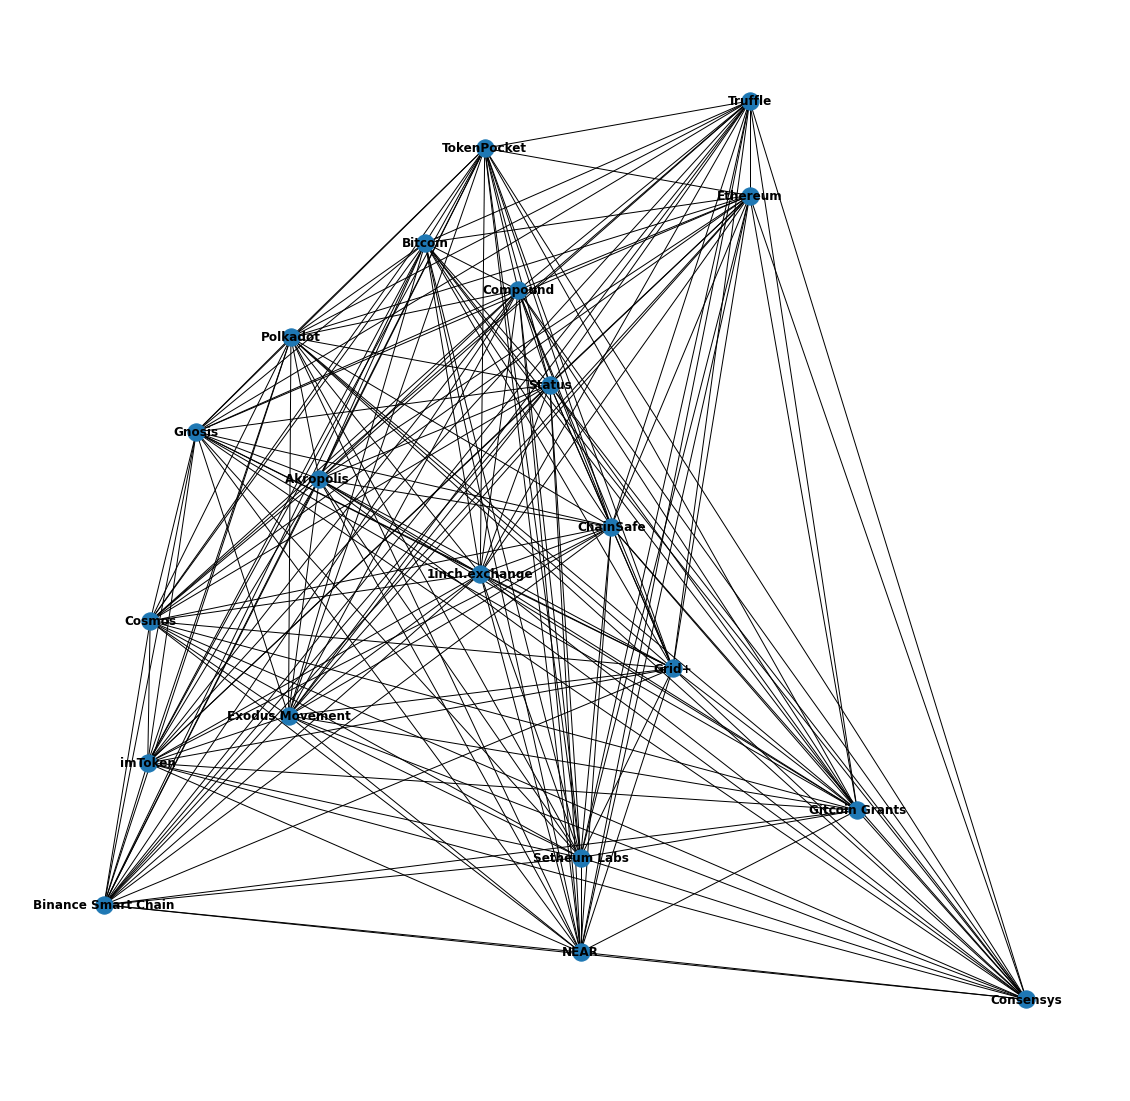

In [259]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

pos = graphviz_layout(subgraph, prog='dot', args='')
plt.figure(figsize=(20,20))
plt.axis('off')
nx.draw_networkx(subgraph,pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(subgraph,'weight')
# nx.draw_networkx_edge_labels(subgraph,pos,edge_labels=labels)
plt.savefig('sample_graph.png',format="PNG")
plt.show()

In [266]:
from pyvis.network import Network
import networkx as nx
from pyvis import network as net

def draw_graph3(networkx_graph,notebook=True,output_filename='graph.html',show_buttons=True,only_physics_buttons=False,
                height=None,width=None,bgcolor=None,font_color=None,pyvis_options=None):
    """
    This function accepts a networkx graph object,
    converts it to a pyvis network object preserving its node and edge attributes,
    and both returns and saves a dynamic network visualization.
    Valid node attributes include:
        "size", "value", "title", "x", "y", "label", "color".
        (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_node)
    Valid edge attributes include:
        "arrowStrikethrough", "hidden", "physics", "title", "value", "width"
        (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_edge)
    Args:
        networkx_graph: The graph to convert and display
        notebook: Display in Jupyter?
        output_filename: Where to save the converted network
        show_buttons: Show buttons in saved version of network?
        only_physics_buttons: Show only buttons controlling physics of network?
        height: height in px or %, e.g, "750px" or "100%
        width: width in px or %, e.g, "750px" or "100%
        bgcolor: background color, e.g., "black" or "#222222"
        font_color: font color,  e.g., "black" or "#222222"
        pyvis_options: provide pyvis-specific options (https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.options.Options.set)
    """

    # import
    from pyvis import network as net

    # make a pyvis network
    network_class_parameters = {"notebook": notebook, "height": height, "width": width, "bgcolor": bgcolor, "font_color": font_color}
    pyvis_graph = net.Network(**{parameter_name: parameter_value for parameter_name, parameter_value in network_class_parameters.items() if parameter_value})

    # for each node and its attributes in the networkx graph
    for node,node_attrs in networkx_graph.nodes(data=True):
        # node_size = np.log10(int(node_attrs['stargazers_count']))
        # node_size = node_attrs['stargazers_count']
        # pyvis_graph.add_node(node,size = node_size,**node_attrs)
        hover_text = f"<h1>{node}</h1><br>"
        hover_text += f" <h2>Stargazers:</h2><h3>{node_attrs['stargazers_count']}</h3><br>"
        hover_text += f" <h2>Forks:</h2><h3>{node_attrs['forks_count']}</h3><br>"
        hover_text += ' <h2>Repos:</h2><br>' + '<br>'.join(node_attrs['repos'])
        
        pyvis_graph.add_node(node, label = node, title = hover_text)

    # for each edge and its attributes in the networkx graph
    for source,target,edge_attrs in networkx_graph.edges(data=True):
        # if value/width not specified directly, and weight is specified, set 'value' to 'weight'
        if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
            # place at key 'value' the weight of the edge
            edge_attrs['value']= np.log10(edge_attrs['weight'])
            # edge_attrs['title']=edge_attrs['weight']
            # edge_attrs['width']=edge_attrs['weight']
        # add the edge
        pyvis_graph.add_edge(source,target,**edge_attrs)
    
    neighbor_map = pyvis_graph.get_adj_list()
    for node in pyvis_graph.nodes:
        node['value'] = len(neighbor_map[node['id']])


    # turn buttons on
    if show_buttons:
        if only_physics_buttons:
            pyvis_graph.show_buttons(filter_=['physics'])
        else:
            pyvis_graph.show_buttons()

    # pyvis-specific options
    if pyvis_options:
        pyvis_graph.set_options(pyvis_options)

    # return and also save
    return pyvis_graph.show(output_filename)

In [269]:
options = '''var options = {
  "nodes": {
    "color": {
      "highlight": {
        "border": "rgba(233,0,61,1)"
      }
    },
    "scaling": {
      "min": 12
    }
  },
  "edges": {
    "color": {
      "color": "rgba(255,2,23,1)",
      "hover": "rgba(132,0,96,1)",
      "inherit": false,
      "opacity": 0.2
    },
    "dashes": true,
    "smooth": false
  },
  "physics": {
    "hierarchicalRepulsion": {
      "centralGravity": 0
    },
    "minVelocity": 0.75,
    "solver": "hierarchicalRepulsion"
  },
  "maxVelocity:":50,
  "minVelocity": 0.75,
  "timestep": 0.5
}'''

# options =  '''
# var options = {
#     "nodes": {
#     "borderWidth": 2,
#     "borderWidthSelected": 4
#   },
#   "edges":{
#     "width":24
#   },
#   "physics": {
#     "barnesHut": {
#       "gravitationalConstant":-2000,
#       "centralGravity": 0,
#       "springLength": 60,
#       "springConstant": 0.545,
#       "damping": 0.1,
#       "avoidOverlap": 0.52
#     },
#     "maxVelocity:":50,
#     "minVelocity": 0.75,
#     "timestep": 0.5
#   }
# }
# '''

In [271]:
draw_graph3(subgraph, notebook = False, height=1000,width=1000,output_filename='token_graph_contributor_edges.html',show_buttons=True,only_physics_buttons=False, pyvis_options=None)

In [272]:
nx.get_edge_attributes(subgraph, "weight")
# list(subgraph.nodes(data = True))[0][1].keys()

{('Truffle', '1inch.exchange'): 215,
 ('Truffle', 'Akropolis '): 212,
 ('Truffle', 'Binance Smart Chain'): 101,
 ('Truffle', 'Bitcoin'): 161,
 ('Truffle', 'ChainSafe'): 349,
 ('Truffle', 'Compound'): 185,
 ('Truffle', 'Consensys'): 371,
 ('Truffle', 'Cosmos'): 164,
 ('Truffle', 'Ethereum'): 992,
 ('Truffle', 'Exodus Movement'): 124,
 ('Truffle', 'Gitcoin Grants'): 1028,
 ('Truffle', 'Gnosis'): 207,
 ('Truffle', 'Grid+'): 146,
 ('Truffle', 'NEAR'): 104,
 ('Truffle', 'Polkadot'): 177,
 ('Truffle', 'Setheum Labs'): 172,
 ('Truffle', 'Status'): 188,
 ('Truffle', 'TokenPocket'): 90,
 ('Truffle', 'imToken'): 125,
 ('TokenPocket', '1inch.exchange'): 79,
 ('TokenPocket', 'Akropolis '): 34,
 ('TokenPocket', 'Binance Smart Chain'): 68,
 ('TokenPocket', 'Bitcoin'): 59,
 ('TokenPocket', 'ChainSafe'): 79,
 ('TokenPocket', 'Compound'): 32,
 ('TokenPocket', 'Consensys'): 61,
 ('TokenPocket', 'Cosmos'): 99,
 ('TokenPocket', 'Ethereum'): 164,
 ('TokenPocket', 'Exodus Movement'): 69,
 ('TokenPocket', 'G

In [228]:
nt = Network("500px", "500px")
nt.from_nx(subgraph)
nt.show("nx.html")

In [ ]:
language_agg_df = repo_mapping_w_info_df.groupby('language').agg({"name":'nunique','repo':'nunique', 'stargazers_count':'sum', 'watchers_count':'sum', 'forks_count':'sum'})
language_agg_df.rename(columns={"name":"unique_tokens", "repo":"unique_repos"}, inplace = True)

In [ ]:
language_agg_df.sort_values(by = 'stargazers_count', ascending=False)

,unique_tokens,unique_repos,stargazers_count,watchers_count,forks_count
language,,,,,
JavaScript,1958,25762,597353.0,597353.0,246508.0
Go,797,5429,264806.0,264806.0,105718.0
C++,943,2456,239743.0,239743.0,97969.0
Rust,553,4321,212838.0,212838.0,56203.0
TypeScript,1476,9716,207912.0,207912.0,119706.0
...,...,...,...,...,...
SuperCollider,1,1,0.0,0.0,0.0
MQL4,1,1,0.0,0.0,0.0
MATLAB,1,1,0.0,0.0,1.0


In [ ]:
pd.set_option('display.max_columns', None)
repo_mapping_w_info_df[repo_mapping_w_info_df.name == 'Binance Coin']

,name,categories,github_organizations,repos,repo_paths,repo,created_at,updated_at,pushed_at,size,stargazers_count,watchers_count,language,has_issues,has_projects,has_downloads,has_wiki,has_pages,forks_count,contributors,scraped_at
96574,Binance Coin,"[None, 'Smart Contract Platform', 'Polygon Eco...",NaN,https://github.com/binance-exchange/binance-of...,/binance-exchange/binance-official-api-docs,/binance-exchange/binance-official-api-docs,2017-12-04T03:55:21Z,2022-01-19T12:42:29Z,2021-08-05T17:46:40Z,1.0,3579.0,3579.0,NaN,False,False,True,False,False,2037.0,"{'login': ['2pd'], 'url': ['https://api.github...",2022-01-19 23:58:18
96575,Binance Coin,"[None, 'Smart Contract Platform', 'Polygon Eco...",NaN,https://github.com/binance-exchange/node-binan...,/binance-exchange/node-binance-api,/binance-exchange/node-binance-api,2017-10-16T04:17:35Z,2022-01-19T03:48:32Z,2021-11-24T02:14:30Z,1217.0,502.0,502.0,JavaScript,True,True,True,True,False,141.0,"{'login': ['jaggedsoft', 'dmzoneill', 'bmino',...",2022-01-19 23:58:18
96576,Binance Coin,"[None, 'Smart Contract Platform', 'Polygon Eco...",NaN,https://github.com/binance-exchange/php-binanc...,/binance-exchange/php-binance-api,/binance-exchange/php-binance-api,2017-11-06T08:57:46Z,2022-01-12T11:59:04Z,2020-12-21T22:38:25Z,796.0,181.0,181.0,PHP,False,True,True,True,False,92.0,"{'login': ['dmzoneill', 'jaggedsoft', 'dxjones...",2022-01-19 23:58:18
